## Import Libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
form astropy import fits
from astropy.stats import mad_std
from photutils.segmentation import detect_sources
from photutils.background import Background2D, MedianBackground
import statmorph
from statmorph.utils.image_diagnostics import make_figure

## List all files availables in the lensed and non_lensed directory

In [4]:
path='Savary_training_set_lenses/'
lensed='Lens_simulations/'
non_lensed='NonLenses/Images/'
lensed_files=os.listdir(path+lensed)
non_lensed_files=os.listdir(path+non_lensed)

## Visualize images

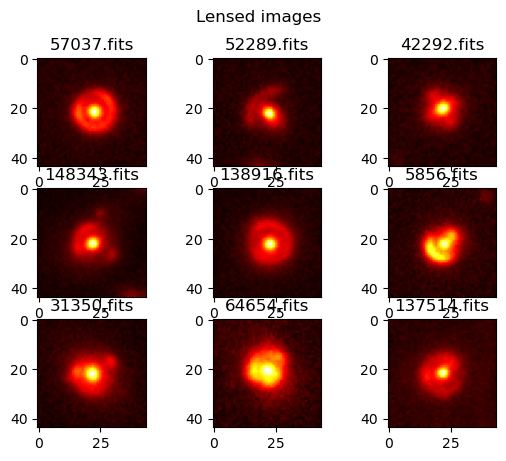

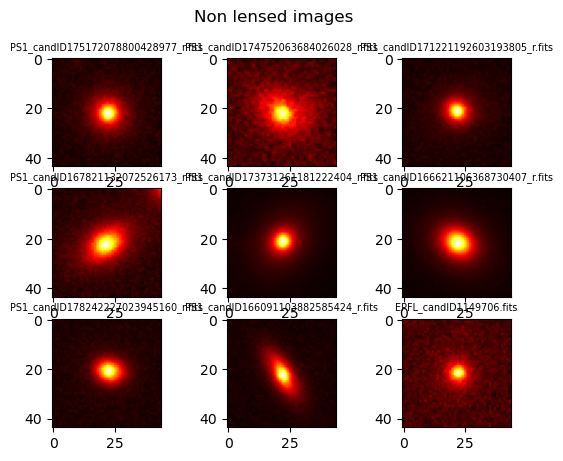

In [5]:
for count, file in zip(range(1,10),lensed_files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('Lensed images')
    plt.subplot(330+count)
    plt.title(file)
    plt.imshow(image, cmap='hot')
plt.show()

for count, file in zip(range(1,10),non_lensed_files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('Non lensed images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

## Visualize segmentation maps

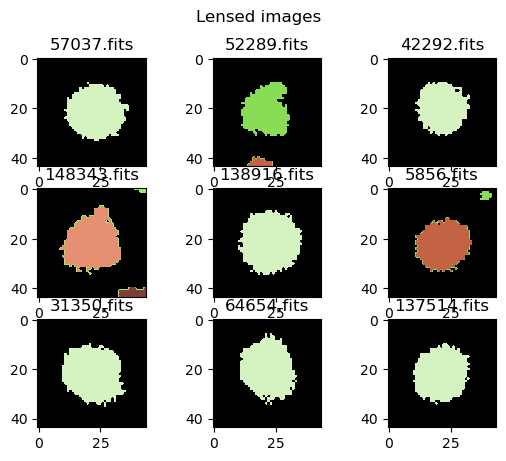

In [6]:
for count, file in zip(range(1,10),lensed_files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    plt.suptitle('Lensed images')
    plt.subplot(330+count)
    plt.title(file)
    plt.imshow(segm.data, cmap=segm.cmap)
plt.show()

## Statmorph applied on lensed images

In [7]:
gain=500.0

for count, file in zip(range(1,10),lensed_files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    bkg_estimator = MedianBackground()
    bkg = Background2D(image, (10, 10), filter_size=(3, 3),bkg_estimator=bkg_estimator)
    image-=bkg.background
    try:
        source_morphs = statmorph.source_morphology(image, segm, gain=gain)
        morph = source_morphs[0]
    except:
        pass

In [8]:
print('xc_centroid =', morph.xc_centroid)
print('yc_centroid =', morph.yc_centroid)
print('ellipticity_centroid =', morph.ellipticity_centroid)
print('elongation_centroid =', morph.elongation_centroid)
print('orientation_centroid =', morph.orientation_centroid)
print('xc_asymmetry =', morph.xc_asymmetry)
print('yc_asymmetry =', morph.yc_asymmetry)
print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
print('elongation_asymmetry =', morph.elongation_asymmetry)
print('orientation_asymmetry =', morph.orientation_asymmetry)
print('rpetro_circ =', morph.rpetro_circ)
print('rpetro_ellip =', morph.rpetro_ellip)
print('rhalf_circ =', morph.rhalf_circ)
print('rhalf_ellip =', morph.rhalf_ellip)
print('r20 =', morph.r20)
print('r80 =', morph.r80)
print('Gini =', morph.gini)
print('M20 =', morph.m20)
print('F(G, M20) =', morph.gini_m20_bulge)
print('S(G, M20) =', morph.gini_m20_merger)
print('sn_per_pixel =', morph.sn_per_pixel)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_rhalf =', morph.sersic_rhalf)
print('sersic_n =', morph.sersic_n)
print('sersic_xc =', morph.sersic_xc)
print('sersic_yc =', morph.sersic_yc)
print('sersic_ellip =', morph.sersic_ellip)
print('sersic_theta =', morph.sersic_theta)
print('sky_mean =', morph.sky_mean)
print('sky_median =', morph.sky_median)
print('sky_sigma =', morph.sky_sigma)
print('flag =', morph.flag)
print('flag_sersic =', morph.flag_sersic)



xc_centroid = 20.9410373308902
yc_centroid = 21.51773977822923
ellipticity_centroid = 0.09434245739827729
elongation_centroid = 1.1041701227676584
orientation_centroid = -0.9639204430903827
xc_asymmetry = 21.244035489492006
yc_asymmetry = 21.36113945719012
ellipticity_asymmetry = 0.0956524022630636
elongation_asymmetry = 1.1057695099787146
orientation_asymmetry = -0.9514349865378389
rpetro_circ = 10.628713556131483
rpetro_ellip = 11.15118024665336
rhalf_circ = 5.602451691819531
rhalf_ellip = 5.80098312505079
r20 = 2.6258734233182537
r80 = 7.891806872913084
Gini = 0.3721034512392777
M20 = -1.6873056612565063
F(G, M20) = -0.9487850931148167
S(G, M20) = -0.19315307018776953
sn_per_pixel = 12.676870707131394
C = 2.3895133052159285
A = 0.2131720791357739
S = 0.03750996471358385
sersic_amplitude = 36.8439031074092
sersic_rhalf = 5.879568638454799
sersic_n = 0.8289918744685119
sersic_xc = 21.346522084681418
sersic_yc = 21.399101616347366
sersic_ellip = 0.14119344194992758
sersic_theta = 2.374

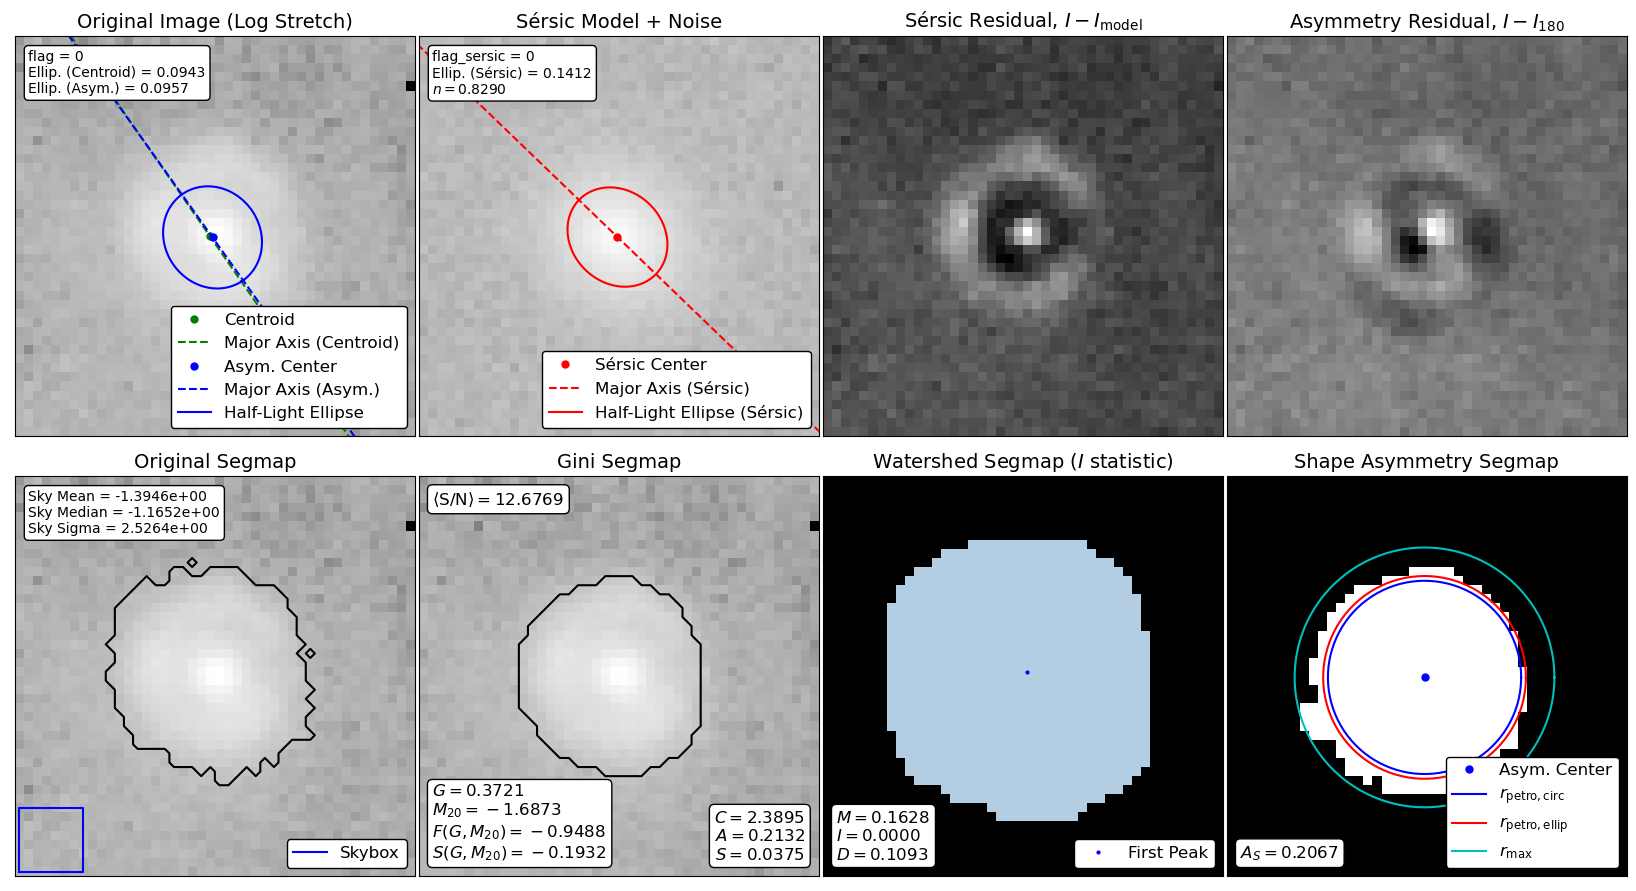

In [9]:
fig = make_figure(morph)

## Statmorph applied on non_lensed images

In [10]:
gain=500.0

for count, file in zip(range(1,10),non_lensed_files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    bkg_estimator = MedianBackground()
    bkg = Background2D(image, (10, 10), filter_size=(3, 3),bkg_estimator=bkg_estimator)
    image-=bkg.background
    try:
        source_morphs = statmorph.source_morphology(image, segm, gain=gain)
        morph = source_morphs[0]
    except:
        pass

In [11]:
print('xc_centroid =', morph.xc_centroid)
print('yc_centroid =', morph.yc_centroid)
print('ellipticity_centroid =', morph.ellipticity_centroid)
print('elongation_centroid =', morph.elongation_centroid)
print('orientation_centroid =', morph.orientation_centroid)
print('xc_asymmetry =', morph.xc_asymmetry)
print('yc_asymmetry =', morph.yc_asymmetry)
print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
print('elongation_asymmetry =', morph.elongation_asymmetry)
print('orientation_asymmetry =', morph.orientation_asymmetry)
print('rpetro_circ =', morph.rpetro_circ)
print('rpetro_ellip =', morph.rpetro_ellip)
print('rhalf_circ =', morph.rhalf_circ)
print('rhalf_ellip =', morph.rhalf_ellip)
print('r20 =', morph.r20)
print('r80 =', morph.r80)
print('Gini =', morph.gini)
print('M20 =', morph.m20)
print('F(G, M20) =', morph.gini_m20_bulge)
print('S(G, M20) =', morph.gini_m20_merger)
print('sn_per_pixel =', morph.sn_per_pixel)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_rhalf =', morph.sersic_rhalf)
print('sersic_n =', morph.sersic_n)
print('sersic_xc =', morph.sersic_xc)
print('sersic_yc =', morph.sersic_yc)
print('sersic_ellip =', morph.sersic_ellip)
print('sersic_theta =', morph.sersic_theta)
print('sky_mean =', morph.sky_mean)
print('sky_median =', morph.sky_median)
print('sky_sigma =', morph.sky_sigma)
print('flag =', morph.flag)
print('flag_sersic =', morph.flag_sersic)



xc_centroid = 22.119265164159824
yc_centroid = 21.712289472392584
ellipticity_centroid = 0.03474908059665005
elongation_centroid = 1.0360000492080643
orientation_centroid = 1.0599318761105858
xc_asymmetry = 22.184444074833834
yc_asymmetry = 21.69164619688153
ellipticity_asymmetry = 0.03450367598339965
elongation_asymmetry = 1.0357367243407614
orientation_asymmetry = 1.058424340000413
rpetro_circ = 8.360857511841685
rpetro_ellip = 8.562715034547674
rhalf_circ = 3.7530687334018586
rhalf_ellip = 3.823009884973304
r20 = 1.9491778129884598
r80 = 6.186122081637753
Gini = 0.4855916192191552
M20 = -1.6951004750624075
F(G, M20) = -0.38161685564693304
S(G, M20) = -0.081883263006711
sn_per_pixel = 6.0154934
C = 2.507835135895897
A = -0.05415592957796464
S = 0.035932423279936385
sersic_amplitude = 30.045228395361057
sersic_rhalf = 3.8230285438266423
sersic_n = 0.7889210937597101
sersic_xc = 22.20246707575911
sersic_yc = 21.670919763139832
sersic_ellip = 0.02384007074713366
sersic_theta = 0.7327391

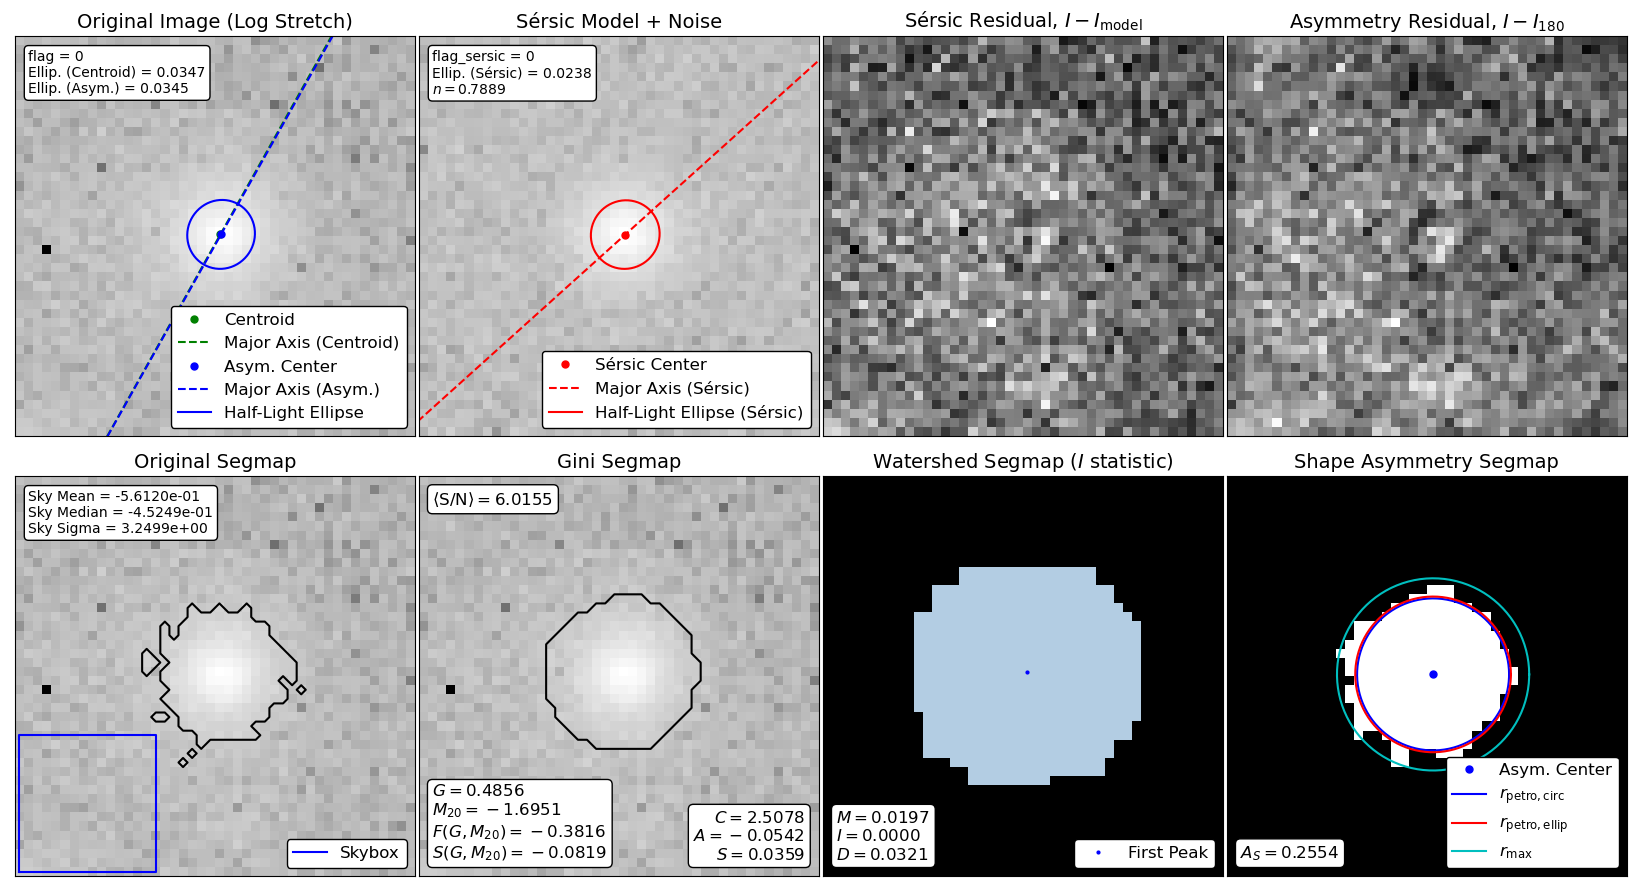

In [12]:
fig = make_figure(morph)

## Do the same thing for non contamined lensed data

In [13]:
subsample_1000=np.load('subsample_1000_statmorph.npy')

In [14]:
gain=500.0

for file in subsample_1000:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    bkg_estimator = MedianBackground()
    bkg = Background2D(image, (10, 10), filter_size=(3, 3),bkg_estimator=bkg_estimator)
    image-=bkg.background
    try:
        source_morphs = statmorph.source_morphology(image, segm, gain=gain)
        morph = source_morphs[0]
    except:
        pass

In [15]:
print('xc_centroid =', morph.xc_centroid)
print('yc_centroid =', morph.yc_centroid)
print('ellipticity_centroid =', morph.ellipticity_centroid)
print('elongation_centroid =', morph.elongation_centroid)
print('orientation_centroid =', morph.orientation_centroid)
print('xc_asymmetry =', morph.xc_asymmetry)
print('yc_asymmetry =', morph.yc_asymmetry)
print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
print('elongation_asymmetry =', morph.elongation_asymmetry)
print('orientation_asymmetry =', morph.orientation_asymmetry)
print('rpetro_circ =', morph.rpetro_circ)
print('rpetro_ellip =', morph.rpetro_ellip)
print('rhalf_circ =', morph.rhalf_circ)
print('rhalf_ellip =', morph.rhalf_ellip)
print('r20 =', morph.r20)
print('r80 =', morph.r80)
print('Gini =', morph.gini)
print('M20 =', morph.m20)
print('F(G, M20) =', morph.gini_m20_bulge)
print('S(G, M20) =', morph.gini_m20_merger)
print('sn_per_pixel =', morph.sn_per_pixel)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_rhalf =', morph.sersic_rhalf)
print('sersic_n =', morph.sersic_n)
print('sersic_xc =', morph.sersic_xc)
print('sersic_yc =', morph.sersic_yc)
print('sersic_ellip =', morph.sersic_ellip)
print('sersic_theta =', morph.sersic_theta)
print('sky_mean =', morph.sky_mean)
print('sky_median =', morph.sky_median)
print('sky_sigma =', morph.sky_sigma)
print('flag =', morph.flag)
print('flag_sersic =', morph.flag_sersic)



xc_centroid = 22.757887393974027
yc_centroid = 22.894748189702277
ellipticity_centroid = 0.18153507253827061
elongation_centroid = 1.2217994521784308
orientation_centroid = 1.1952619711037733
xc_asymmetry = 22.449618176847267
yc_asymmetry = 22.26952989574734
ellipticity_asymmetry = 0.19548257684385617
elongation_asymmetry = 1.2429811601555782
orientation_asymmetry = 1.187267788745071
rpetro_circ = 10.655078416858336
rpetro_ellip = 11.426369744487808
rhalf_circ = 3.5658595917325995
rhalf_ellip = 3.958873157114995
r20 = 1.6743622670824774
r80 = 7.13273171533514
Gini = 0.5782404689104959
M20 = -1.7869247392817047
F(G, M20) = 0.1406291654291758
S(G, M20) = -0.0029244745387660975
sn_per_pixel = 10.835208295634125
C = 3.1470323041097625
A = 0.1502359563394515
S = 0.07555695907731078
sersic_amplitude = 57.92496266829865
sersic_rhalf = 3.614978725575757
sersic_n = 1.08784389860862
sersic_xc = 22.476526169386368
sersic_yc = 22.296595156987976
sersic_ellip = 0.13541219658666556
sersic_theta = 1.

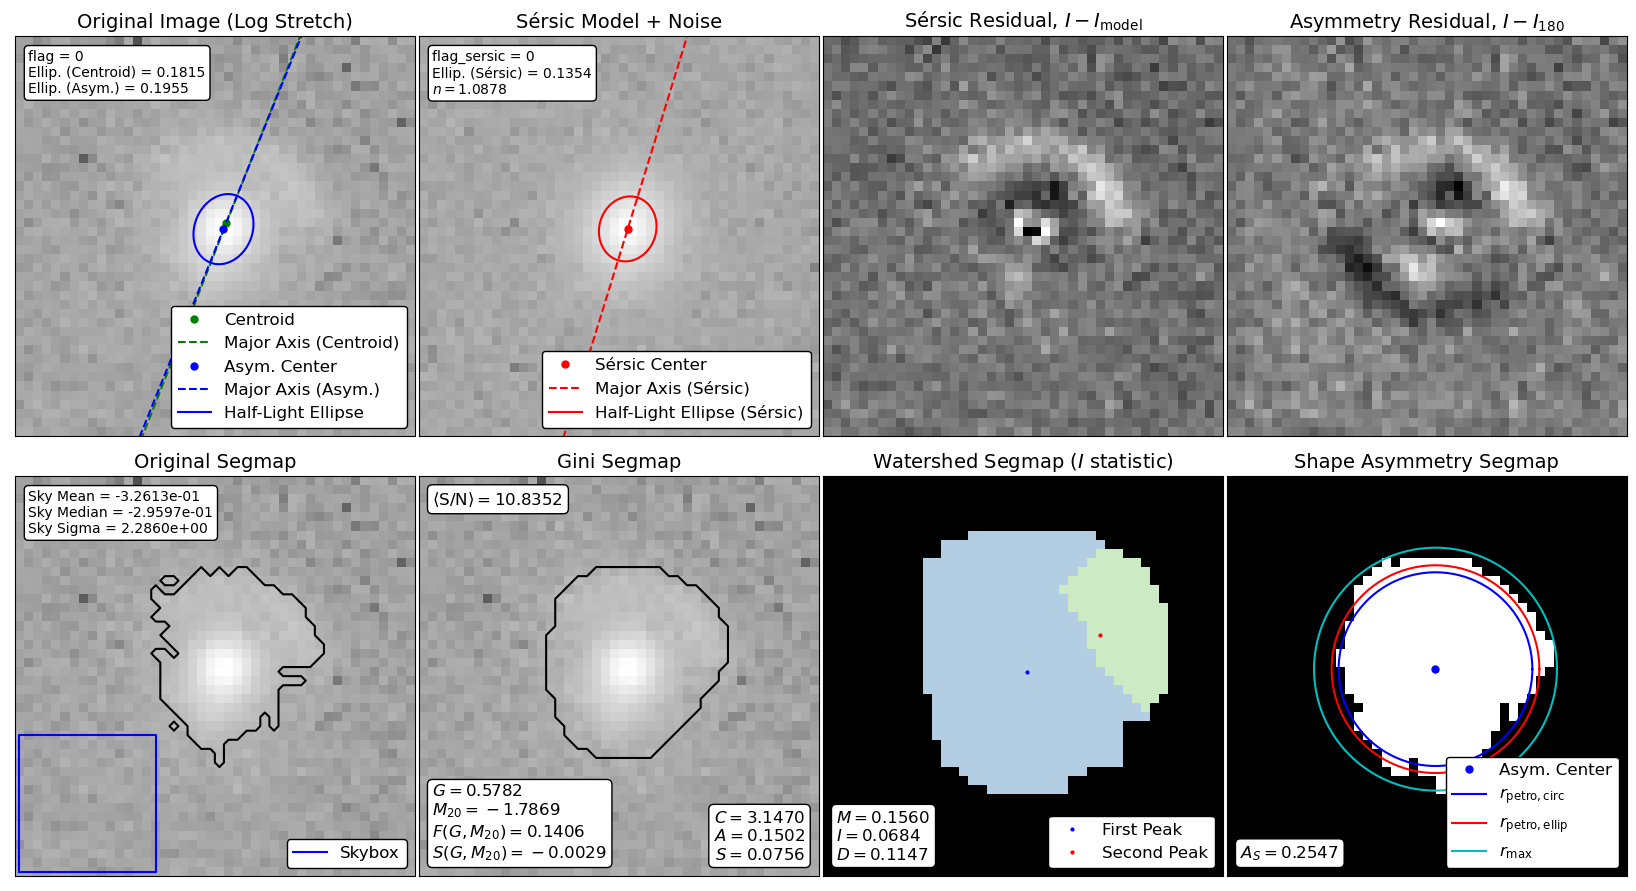

In [16]:
fig = make_figure(morph)